<a href="https://colab.research.google.com/github/DaverArenas/DeepLearning_ImageClassification/blob/main/IntroductionToDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FORWARD PROPAGATION CODE

Ejemplo_1

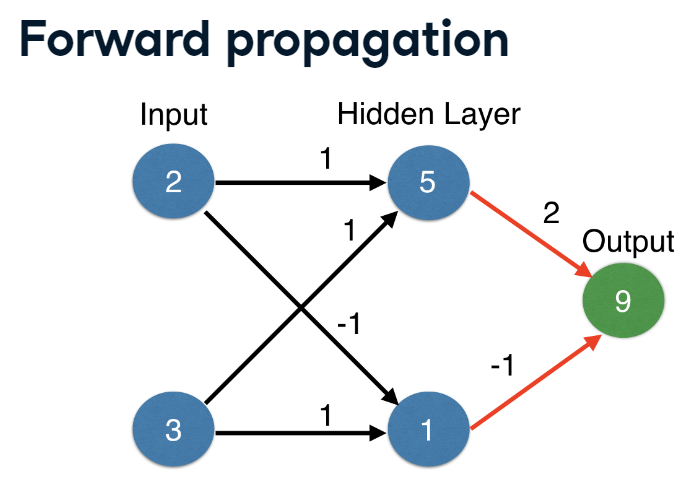

In [ ]:
import numpy as np

In [ ]:
input_data = np.array([2,3])

In [ ]:
weights = {'node_0': np.array([1,1]), 'node_1': np.array([-1,1]), 'output': np.array([2,-1]) }

In [ ]:
node_0_value = (input_data * weights['node_0']).sum()

In [ ]:
node_1_value = (input_data * weights['node_1']).sum()

In [ ]:
hidden_layer_values = np.array([node_0_value, node_1_value])

In [ ]:
output = (hidden_layer_values*weights['output']).sum()
print(output)

9


Ejemplo_2

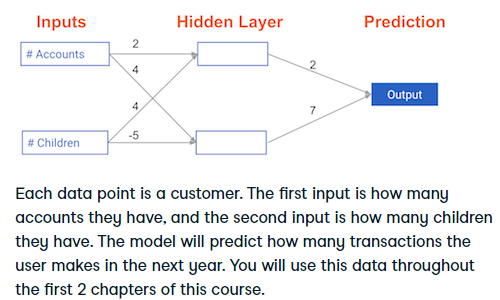

In [ ]:
input_data = np.array([3,5])

In [ ]:
weights = {'node_0': np.array([2,4]), 'node_1': np.array([4,-5]), 'output': np.array([2,7]) }

In [ ]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs*weights['output']).sum()

# Print output
print(output)


-39


#Implementing ReLu function in Python

In [ ]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0.0, input)
    
    # Return the value just calculated
    return(output)

In [ ]:
relu(-8)

0.0

#USING THE ACTIVATION FUNCTION

In [ ]:

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52.0


#Applying the network to many observations/rows of data

In [ ]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 'output': np.array([2, 7]), 'node_1': np.array([ 4, -5])}

In [ ]:
input_data

[array([3, 5]), array([ 1, -1]), array([0, 0]), array([8, 4])]

In [ ]:
weights

{'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}

In [ ]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row*weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row*weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs*weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [ ]:
# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52.0, 63.0, 0.0, 148]


#MULTIPLE HIDDEN LAYERS

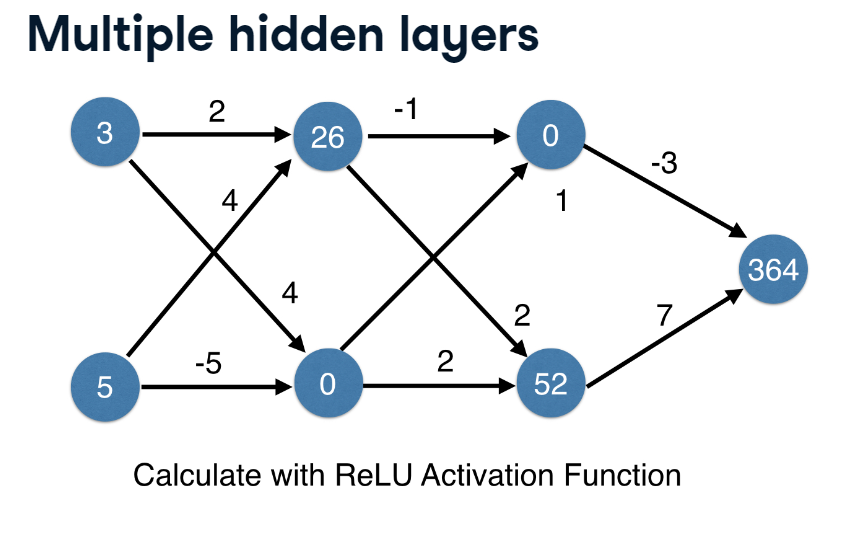

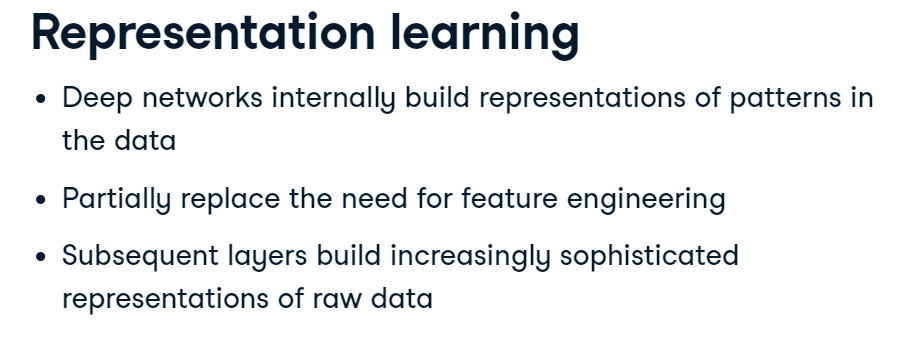

#EXAMPLE USING MULTI-LAYER NEURAL NETWORKS

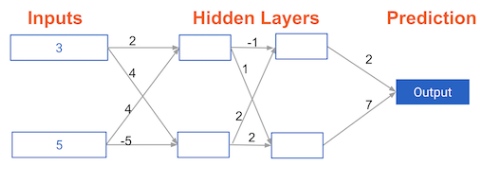

In [ ]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs*weights['output']).sum()
    
    # Return model_output
    return(model_output)


In [ ]:
weights = {'node_1_0': np.array([-1,  2]), 'output': np.array([2, 7]), 'node_0_0': np.array([2, 4]), 'node_0_1': np.array([ 4, -5]), 'node_1_1': np.array([1, 2])}

In [ ]:
input_data = np.array([3,5])
output = predict_with_network(input_data)
print(output)

182.0


##Coding how weight changes affect accuracy


#the predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

In [ ]:
def predict_with_network(input_data, weights):
    # Calculate node 0 
    node_0 = (input_data * weights['node_0']).sum()
    node_0 = relu(node_0)

    # Calculate node 1
    node_1 = (input_data * weights['node_1']).sum()
    node_1 = relu(node_1)
    
    # Put node values into array: hidden_0_outputs
    hidden_outputs = np.array([node_0, node_1])

    # Calculate model output: model_output
    model_output = (hidden_outputs*weights['output']).sum()
    
    # Return model_output
    return(model_output)

In [ ]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, -2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3


In [ ]:
# Make prediction using original weights
model_output = predict_with_network(input_data, weights_0)

In [ ]:
print(model_output)

3.0


In [ ]:
# Calculate error: error_1
error_1 = model_output - target_actual

In [ ]:
error_1

0.0

##Scaling up to multiple data points

In [ ]:
weights_0 = {'output': np.array([1, 1]), 'node_0': np.array([2, 1]), 'node_1': np.array([1, 2])}

In [ ]:
weights_1 = {'output': np.array([1. , 1.5]), 'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5])}

In [ ]:
target_actuals = [1, 3, 5, 7]

In [ ]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

In [ ]:
def predict_with_network(input_data, weights):
    # Calculate node 0 
    node_0 = (input_data * weights['node_0']).sum()
    node_0 = relu(node_0)

    # Calculate node 1
    node_1 = (input_data * weights['node_1']).sum()
    node_1 = relu(node_1)
    
    # Put node values into array: hidden_0_outputs
    hidden_outputs = np.array([node_0, node_1])

    # Calculate model output: model_output
    model_output = (hidden_outputs*weights['output']).sum()
    
    # Return model_output
    return(model_output)


In [ ]:
print(input_data)

[array([0, 3]), array([1, 2]), array([-1, -2]), array([4, 0])]


In [ ]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []



In [ ]:
# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))



In [ ]:

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals ,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals ,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625
